In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')


# 1). Find the oldest and newest movie
print("\n----- Oldest and Newest Movie -----")
oldest = df["Released_Year"].min()
newest = df["Released_Year"].max()

oldest_movie = df[df["Released_Year"] == oldest][["Series_Title", "Released_Year", "IMDB_Rating"]]
newest_movie = df[df["Released_Year"] == newest][["Series_Title", "Released_Year", "IMDB_Rating"]]

print("Oldest Movie:\n", oldest_movie)
print("\nNewest Movie:\n", newest_movie)

In [ ]:
# 2). Top 10 highest rated movies
print("\n----- Top 10 Highest Rated Movies -----")
highest_rated = df.sort_values("IMDB_Rating",ascending=False).head(10)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])

In [ ]:
# 3). Top 10 most voted movies
print("\n----- Top 10 Most Voted Movies -----")
highest_voted = df.sort_values("No_of_Votes",ascending=False).head(10)
print(highest_voted[["Series_Title","Released_Year","IMDB_Rating","Director","No_of_Votes"]])

In [ ]:
# 4). Highest rated movies released after year 2000
print("\n----- Highest Rated Movies After 2000 -----")
df_2000 = df[df["Released_Year"] > 2000]
highest_rated = df_2000.sort_values("IMDB_Rating",ascending=False).head(10)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])

In [ ]:
# 5). Shortest and longest runtime movies
print("\n----- Shortest and Longest Runtime Movies -----")

shortest = df["Runtime"].min()
longest = df["Runtime"].max()

shortest_movie = df[df["Runtime"] == shortest][["Series_Title", "Runtime", "IMDB_Rating","Released_Year","Director"]]
longest_movie = df[df["Runtime"] == longest][["Series_Title", "Runtime", "IMDB_Rating","Released_Year","Director"]]

print("\nShortest Movie:\n", shortest_movie)
print("\nLongest Movie:\n", longest_movie)

In [ ]:
# 6). All movies directed by Christopher Nolan
print("\n----- Movies Directed By Christopher Nolan -----")
director = df[df["Director"] == "Christopher Nolan"]
highest_rated = director.sort_values("IMDB_Rating",ascending=False)
print(highest_rated[["Series_Title","Released_Year","IMDB_Rating","Director"]])

In [ ]:
# 7). Directors with at least 3 movies and highest average rating
print("\n----- Directors With Highest Avg Rating (Min 3 Movies) -----")
director_group = df.groupby("Director").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

director_group = director_group[director_group["movie_count"] >= 3]
highest = director_group.sort_values("avg_rating", ascending=False).head(10)
print(highest) 

In [ ]:
# 8). Top 10 highest grossing movies
print("\n----- Top 10 Highest Grossing Movies -----")
highest_Gross = df.sort_values("Gross",ascending=False).head(10)
print(highest_Gross[["Series_Title","Released_Year","IMDB_Rating","Director","Gross"]])

In [ ]:
# 9). Genre wise avg rating and movie count
print("\n----- Genre Wise Average Rating & Movie Count -----")
df_genre = df.assign(Genre = df["Genre"].str.split(", ")).explode("Genre")

grouped = df_genre.groupby("Genre").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)
print(grouped.sort_values("avg_rating", ascending=False).head(10))

In [ ]:
# 10). Top actors by number of movies
print("\n----- Top Actors By Number of Movies -----")
df_actor = df[["Star1", "Star2", "Star3", "Star4"]].melt(value_name="Actor")["Actor"]
actor_count = df_actor.value_counts().head(10)
print(actor_count)

In [ ]:
# 11). Certificate category rating and movie count
print("\n----- Rating & Movie Count By Certificate Category -----")
grouped = df.groupby("Certificate").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

print(grouped.sort_values("movie_count", ascending=False))

In [ ]:
# 12). Top actors with highest avg rating (min 5 films)
print("\n----- Top Actors With Highest Avg Rating (Min 5 Movies) -----")
actors_df = df.melt(
    id_vars=["Series_Title", "IMDB_Rating"],
    value_vars=["Star1", "Star2", "Star3", "Star4"],
    var_name="Actor_Position",
    value_name="Actor"
)

actor_group = actors_df.groupby("Actor").agg(
    avg_rating=("IMDB_Rating", "mean"),
    movie_count=("Series_Title", "count")
)
actor_group = actor_group[actor_group["movie_count"] >= 5]
top_actors = actor_group.sort_values("avg_rating", ascending=False).head(10)
print(top_actors)

In [ ]:
# 13). Year wise total movies & rating trend
print("\n----- Year Wise Movie Count & Avg Rating -----")
grouped = df.groupby("Released_Year").agg(
    avg_rating = ("IMDB_Rating", "mean"),
    movie_count = ("Series_Title", "count")
)

print("Most Movies Produced:\n", grouped.sort_values("movie_count", ascending=False).head(5))
print("Least Movies Produced:\n", grouped.sort_values("movie_count").head(5))

In [ ]:
# 14). Highly rated but low gross & low rated but high gross
print("\n----- Top 10 Highly Rated But Low Gross -----")
high_rating_low_gross = df.sort_values(["IMDB_Rating", "Gross"], ascending=[False, True]).head(10)
print(high_rating_low_gross[["Series_Title","IMDB_Rating","Gross","Director"]])

print("\n----- Top 10 Low Rated But High Gross -----")
low_rating_high_gross = df.sort_values(["IMDB_Rating","Gross"], ascending=[True,False]).head(10)
print(low_rating_high_gross[["Series_Title","IMDB_Rating","Gross","Director"]])

In [ ]:
# 15). Distribution of IMDB Ratings
# This shows how ratings are spread and helps identify if most movies are highly rated or average.
sns.histplot(df["IMDB_Rating"], bins=20, kde=True)
plt.title("IMDB Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
# 16). Number of Movies Released Each Year
# Helps detect whether movie production increased or reduced over time.
sns.histplot(df["Released_Year"], bins=20, kde=True)
plt.title("Released Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Movie Count")
plt.show()

In [ ]:
# 17). Top 10 Directors by Number of Movies
# Shows which directors have contributed the most movies in top IMDb list.
director_count = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=director_count.values, y=director_count.index)
plt.title("Top 10 Directors by Number of Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Director Name")
plt.show()

In [ ]:
# 18). Number of Movies Released Per Decade
# Shows trend over decades — Golden age vs modern era comparison.
df["Decade"] = (df["Released_Year"] // 10) * 10
decade_count = df["Decade"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=decade_count.index, y=decade_count.values, marker="o")
plt.title("Movies Released Per Decade")
plt.xlabel("Decade")
plt.ylabel("Movie Count")
plt.grid(True)
plt.show()

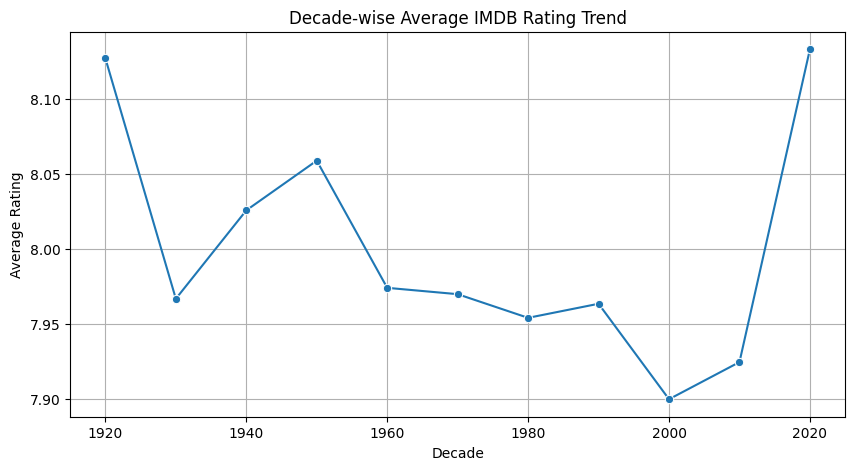

In [78]:
# 19). Decade wise average rating trend
df["Decade"] = (df["Released_Year"] // 10) * 10
decade_avg_rating = df.groupby("Decade")["IMDB_Rating"].mean().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=decade_avg_rating.index, y=decade_avg_rating.values, marker="o")
plt.title("Decade-wise Average IMDB Rating Trend")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [ ]:
# 20). Correlation Heatmap
sns.heatmap(df[["IMDB_Rating","Runtime","Meta_score","Gross","No_of_Votes"]].corr(), annot=True, linewidths=1)
plt.title("Correlation Between Variables")
plt.show()